A.1.1 Per type (Standard Tournament)
-----------

Each tournament type.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [2]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

Noisy
-------

In [3]:
df = pd.read_csv('data/df.csv')

In [4]:
noisy_tournaments = df[(~df['noise'].isnull()) & (df['probend'].isnull())]

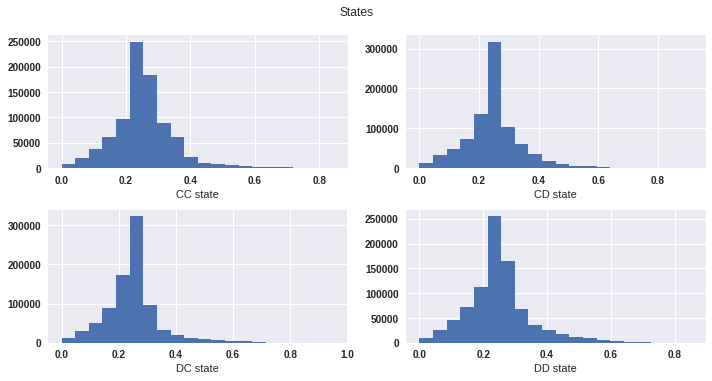

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

fig.suptitle('States', y=1.05)
axes[0][0].hist(noisy_tournaments['CC_rate'], bins=20); axes[0][0].set_xlabel('CC state')
axes[0][1].hist(noisy_tournaments['CD_rate'], bins=20); axes[0][1].set_xlabel('CD state')

axes[1][0].hist(noisy_tournaments['DC_rate'], bins=20); axes[1][0].set_xlabel('DC state')
axes[1][1].hist(noisy_tournaments['DD_rate'], bins=20); axes[1][1].set_xlabel('DD state')
plt.tight_layout()

plt.show()

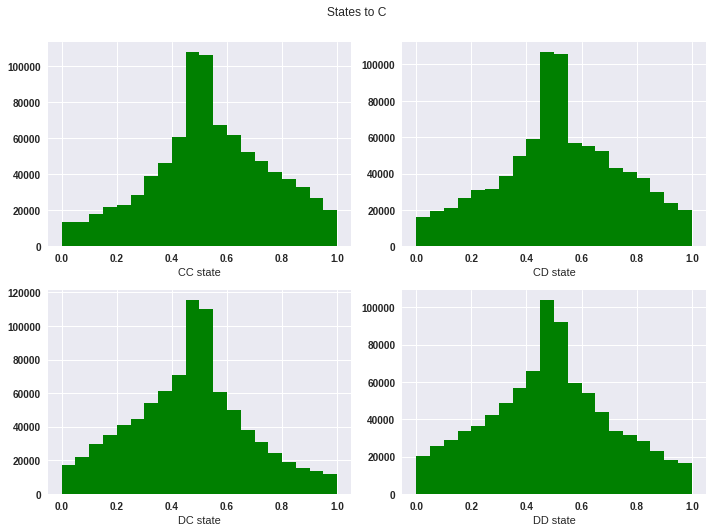

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

fig.suptitle('States to C', y=1.05)

axes[0][0].hist(noisy_tournaments['CC_to_C_rate'], bins=20, color='green'); axes[0][0].set_xlabel('CC state', )
axes[0][1].hist(noisy_tournaments['CD_to_C_rate'], bins=20, color='green'); axes[0][1].set_xlabel('CD state', )

axes[1][0].hist(noisy_tournaments['DC_to_C_rate'], bins=20, color='green'); axes[1][0].set_xlabel('DC state', )
axes[1][1].hist(noisy_tournaments['DD_to_C_rate'], bins=20, color='green'); axes[1][1].set_xlabel('DD state',)
plt.tight_layout()
plt.show()

Fixed data set
--------------

In [9]:
df, name = pd.read_csv('data/noise_tournaments.csv'), 'noise'

In [6]:
df.columns

Index(['index', 'loser coop', 'max coop', 'mean coop', 'median coop',
       'min coop', 'norm rank C', 'norm rank D', 'size', 'std', 'winner coop'],
      dtype='object')

In [7]:
with open("/home/nightwing/rsc/Annual Report/tex/type_tournaments_columns.tex", "w") as f:
    string = df[:1].to_latex()
    f.write(string)

**I. Highest cooperator**

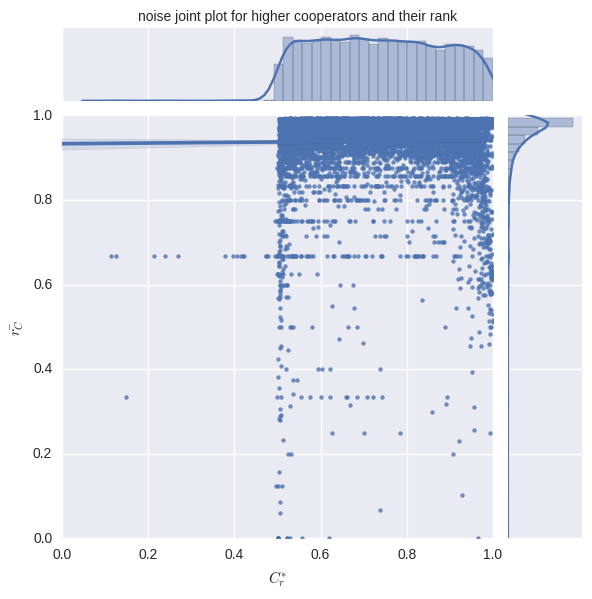

In [4]:
tools.violin_plot(df, 'max coop', 'norm rank C', r'$C^{*}_{r}$', 
                  r'$ \bar{r_{C}}$',  
                  '{} joint plot for higher cooperators and their rank'.format(name))

**II. Lowest cooperator**

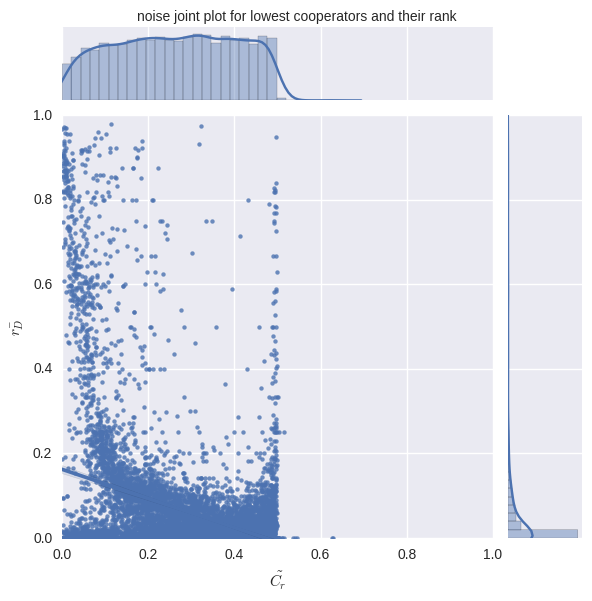

In [5]:
tools.violin_plot(df, 'min coop', 'norm rank D', r'$\tilde{C_{r}}$', 
                  r'$ \bar{r_{D}}$',  
                  '{} joint plot for lowest cooperators and their rank'.format(name))

**III. Winners of the tournaments**

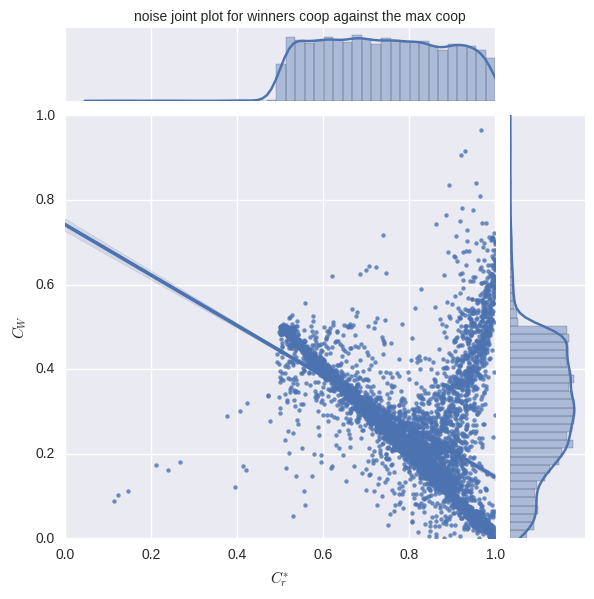

In [6]:
# winner vs max coop
tools.violin_plot(df, 'max coop','winner coop', r'$C^{*}_{r}$', r'$C_{W}$',   
                  '{} joint plot for winners coop against the max coop'.format(name))

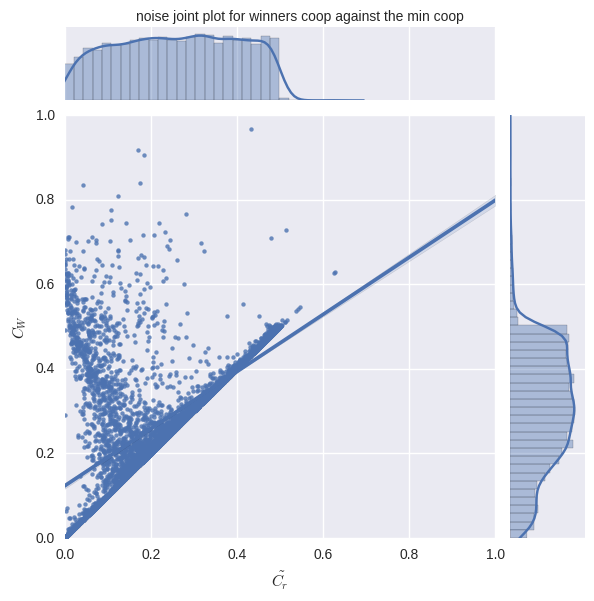

In [7]:
# winner vs min coop
tools.violin_plot(df, 'min coop','winner coop', r'$\tilde{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the min coop'.format(name))

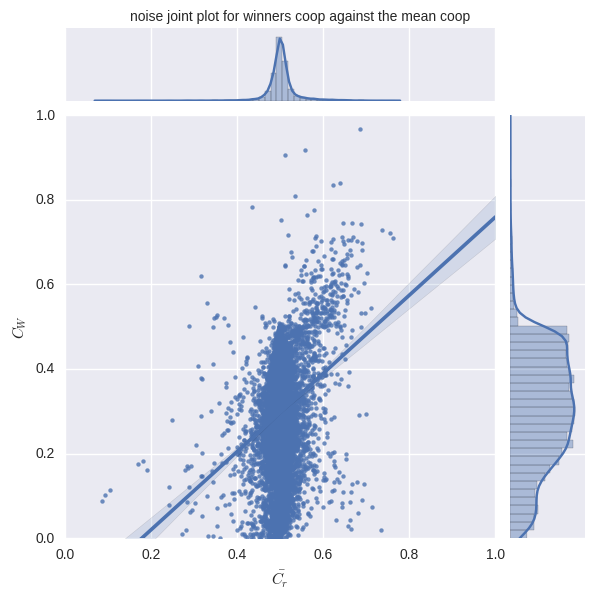

In [8]:
# winner vs mean coop
tools.violin_plot(df, 'mean coop','winner coop', r'$\bar{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the mean coop'.format(name))

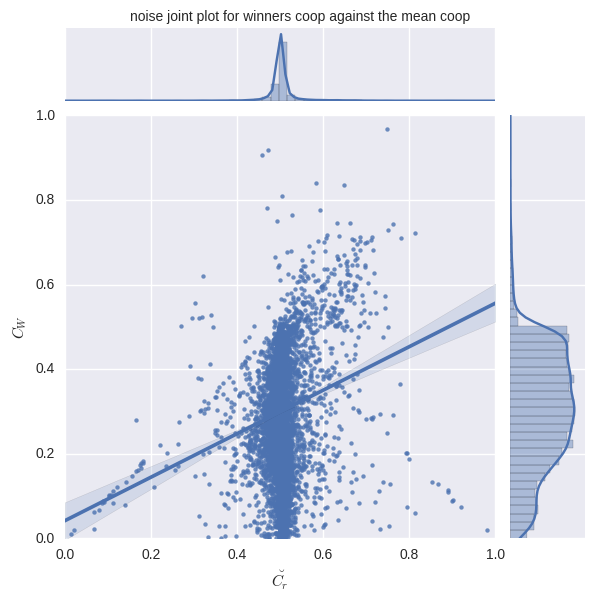

In [9]:
# winner vs median coop
tools.violin_plot(df, 'median coop','winner coop', r'$\breve{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the mean coop'.format(name))

**IV. The losers**

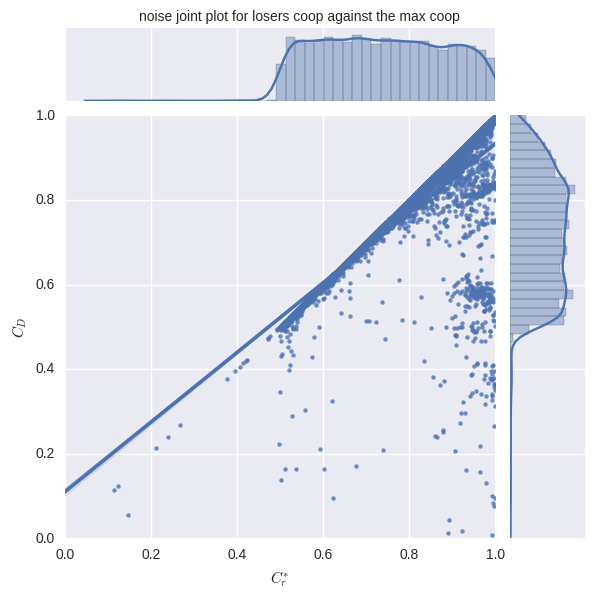

In [10]:
# loser vs max coop
tools.violin_plot(df, 'max coop','loser coop', r'$C^{*}_{r}$', r'$C_{D}$',   
                  '{} joint plot for losers coop against the max coop'.format(name))

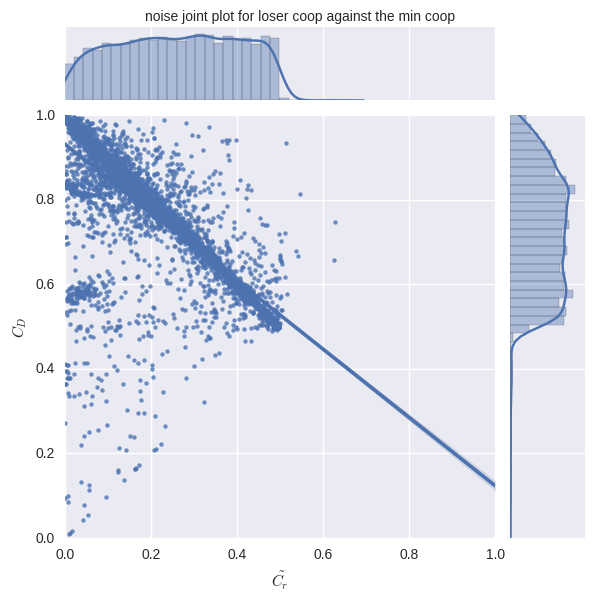

In [11]:
# loser vs min coop
tools.violin_plot(df, 'min coop','loser coop', r'$\tilde{C_{r}}$', 
                  r'$C_{D}$',  
                  '{} joint plot for loser coop against the min coop'.format(name))

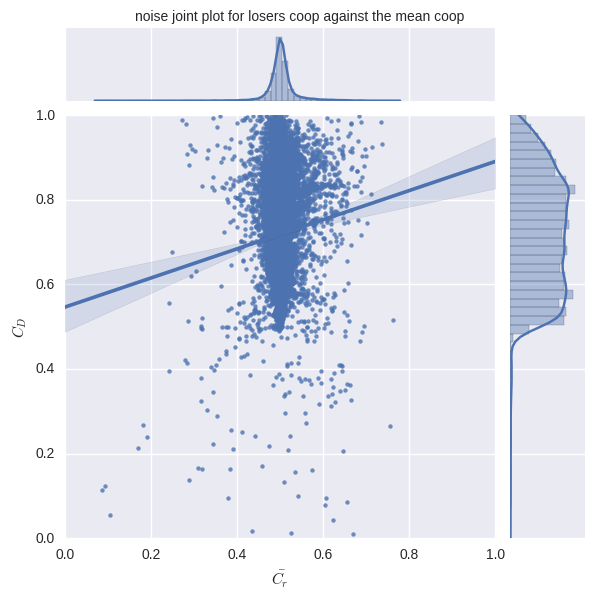

In [12]:
# loser vs mean coop
tools.violin_plot(df, 'mean coop','loser coop', r'$\bar{C_{r}}$', 
                  r'$C_{D}$',  
                  '{} joint plot for losers coop against the mean coop'.format(name))

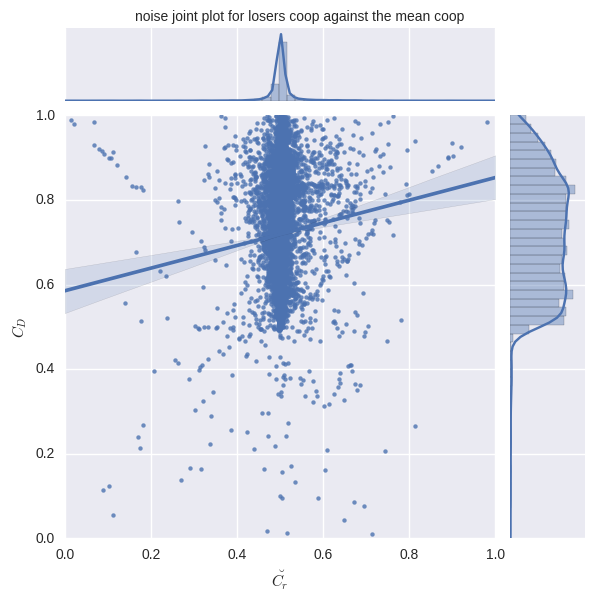

In [13]:
# loser vs median coop
tools.violin_plot(df, 'median coop','loser coop', r'$\breve{C_{r}}$', 
                  r'$C_{D}$',  
                  '{} joint plot for losers coop against the mean coop'.format(name))

**V. $r$ distribution**

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


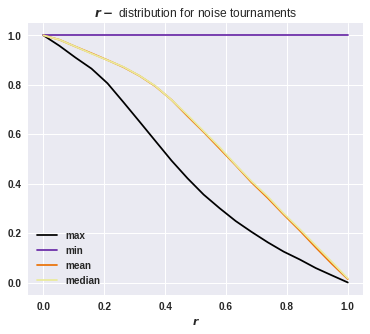

In [11]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))

Based on the analysis above, the following points are made for the noise tournaments:

- the mean/median $C$ has been $\simeq 0.5$
- players that defect more $\simeq 0.4 - 0.2$ do better
- cooperators perform poorly
- the more you cooperative the less well you will do, but the $r-$ distribution is decreasing smoothly

that could be because a less cooperative player does perform well but not a complete defector.